initializing ocelot...
emit_x  = 0.0
emit_y  = 0.0
beta_x  = 5.086615091650253
beta_y  = 9.539839096585023
alpha_x = -0.7930635936243079
alpha_y = 1.4335484088430734
gamma_x = 0.3202424076093834
gamma_y = 0.32024240760938283
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 4.260922016528861
muy     = 4.260922016528861
nu_x    = 0.6781468010596547
nu_y    = 0.6781468010596547
E       = 0.0
s        = 29.039999999999996

12


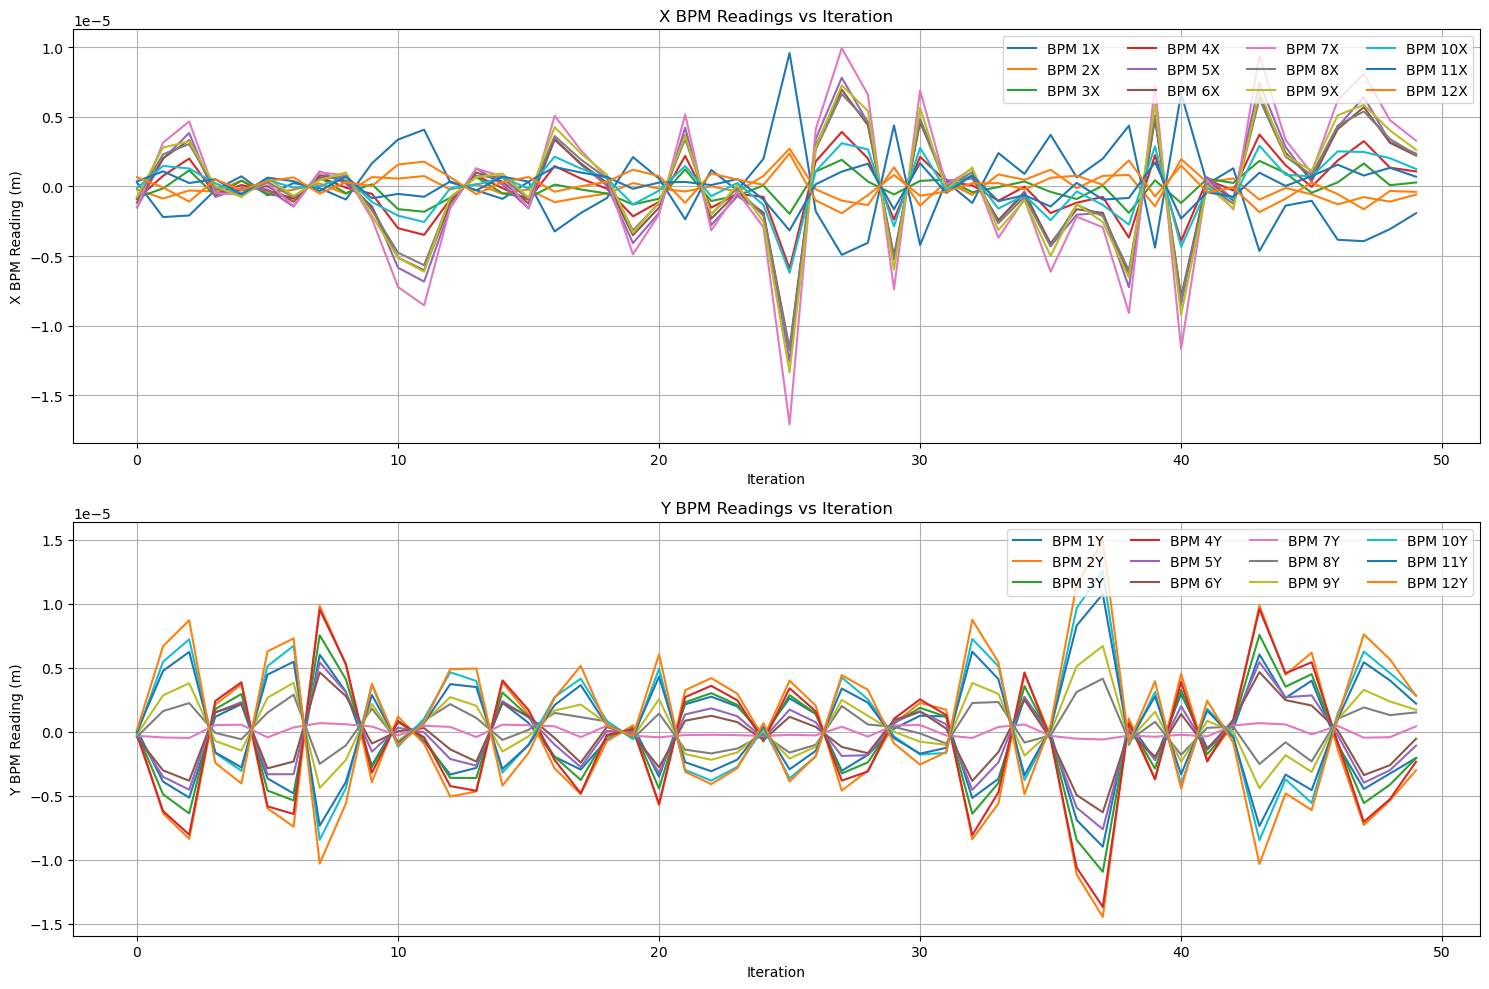

X方向BPM读数统计:
  平均值范围: -1.20e-07 ~ 1.01e-07 m
  标准差范围: 8.47e-07 ~ 5.32e-06 m
Y方向BPM读数统计:
  平均值范围: -9.59e-07 ~ 9.59e-07 m
  标准差范围: 4.36e-07 ~ 5.24e-06 m


In [1]:
from ocelot import *
from ocelot.gui.accelerator import *
from fodo_lattice import *

lat = MagneticLattice(cell)
tws = twiss(lat, nPoints=1000)
print(tws[-1])

# plot_opt_func(lat, tws, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
# plt.show()

k1_init = get_k1_array(lat)
hcors_init = get_hcors_angle(lat)
print(len(hcors_init))
vcors_init = get_vcors_angle(lat)

# 存储每次循环的BPM读数
bpm_x_history = []
bpm_y_history = []

# 循环50次，每次给粒子位置添加随机变化
for i in range(50):
    # 在正负10微米范围内添加正态分布的随机变化
    # 使用正态分布，标准差设为10/3微米以确保大部分值在正负10微米范围内
    dx = np.random.normal(0, 10e-6/3)  # 10微米 = 10e-6米
    dy = np.random.normal(0, 10e-6/3)
    dpx = np.random.normal(0, 10e-6/3)
    dpy = np.random.normal(0, 10e-6/3)
    
    # 确保随机变化在正负10微米范围内
    dx = np.clip(dx, -10e-6, 10e-6)
    dy = np.clip(dy, -10e-6, 10e-6)
    dpx = np.clip(dpx, -10e-8, 10e-8)
    dpy = np.clip(dpy, -10e-8, 10e-8)
    
    # 创建带有随机变化的粒子
    p_init = Particle(x=0+dx, y=0+dy, px=-1e-8+dpx, py=2e-8+dpy, E=1)
    
    # 获取理想轨道
    orb_x, orb_y = get_ideal_orbit(lat, k1_init, hcors_init, vcors_init, p_init)
    
    # 存储BPM读数
    bpm_x_history.append(orb_x)
    bpm_y_history.append(orb_y)

# 转换为numpy数组便于绘图
bpm_x_history = np.array(bpm_x_history)
bpm_y_history = np.array(bpm_y_history)

# 绘制BPM读数随时间变化的趋势
plt.figure(figsize=(15, 10))

# 绘制X方向BPM读数
plt.subplot(2, 1, 1)
for i in range(12):  # 12个BPM
    plt.plot(bpm_x_history[:, i], label=f'BPM {i+1}X')
plt.xlabel('Iteration')
plt.ylabel('X BPM Reading (m)')
plt.title('X BPM Readings vs Iteration')
plt.grid(True)
plt.legend(loc='upper right', ncol=4)

# 绘制Y方向BPM读数
plt.subplot(2, 1, 2)
for i in range(12):  # 12个BPM
    plt.plot(bpm_y_history[:, i], label=f'BPM {i+1}Y')
plt.xlabel('Iteration')
plt.ylabel('Y BPM Reading (m)')
plt.title('Y BPM Readings vs Iteration')
plt.grid(True)
plt.legend(loc='upper right', ncol=4)

plt.tight_layout()
plt.show()

# 输出统计信息
print(f"X方向BPM读数统计:")
print(f"  平均值范围: {np.mean(bpm_x_history, axis=0).min():.2e} ~ {np.mean(bpm_x_history, axis=0).max():.2e} m")
print(f"  标准差范围: {np.std(bpm_x_history, axis=0).min():.2e} ~ {np.std(bpm_x_history, axis=0).max():.2e} m")

print(f"Y方向BPM读数统计:")
print(f"  平均值范围: {np.mean(bpm_y_history, axis=0).min():.2e} ~ {np.mean(bpm_y_history, axis=0).max():.2e} m")
print(f"  标准差范围: {np.std(bpm_y_history, axis=0).min():.2e} ~ {np.std(bpm_y_history, axis=0).max():.2e} m")

# p = Particle(x=0, y=0, px=-1e-8, py=2e-8, E=1)
# hcors_init = np.array([1,1,-1,-1,-1,1,-1,1,1,1,-1,1])
# orb_x, orb_y = get_ideal_orbit(lat, k1_init, hcors_init, vcors_init, p)  
# print(orb_x, orb_y, sep='\n')
# plt.plot(orb_x)
# plt.plot(orb_y)
# plt.show()


In [2]:
# 导入TD3智能体模块
from td3_agent import *
import numpy as np
import matplotlib.pyplot as plt

# 查看所有超参数
print("TD3超参数:")
for key, value in HYPERPARAMS.items():
    print(f"  {key}: {value}")

Using device: cuda
TD3超参数:
  state_dim: 72
  action_dim: 24
  hidden_dim: 256
  actor_lr: 0.0003
  critic_lr: 0.0003
  gamma: 0.99
  tau: 0.005
  policy_noise: 0.1
  noise_clip: 0.25
  policy_freq: 2
  buffer_size: 1000000
  batch_size: 256
  warmup_steps: 2000
  max_episodes: 1000
  max_steps_per_episode: 200
  reward_weights: {'orbit_improvement': 1.0, 'action_penalty': 1.0, 'completion_bonus': 50.0}
  target_threshold: 1e-05
  action_range: {'min': 0.001, 'max': 0.01}
  cor_angle_limit: 0.3


In [3]:
# TD3智能体超参数配置
HYPERPARAMS = {
    'state_dim': 72,           # 状态维度 (24个BPM读数 + 24个当前与上次差异 + 24个上次与上上次差异)
    'action_dim': 24,          # 动作维度 (12个水平校正器 + 12个垂直校正器)
    'hidden_dim': 256,         # 神经网络隐藏层维度，影响模型复杂度和表达能力
    'actor_lr': 3e-4,          # Actor网络学习率，控制策略网络参数更新步长
    'critic_lr': 3e-4,         # Critic网络学习率，控制价值网络参数更新步长
    'gamma': 0.99,             # 折扣因子，决定未来奖励的衰减程度，越接近1越重视长远奖励
    'tau': 0.005,              # 软更新参数，控制目标网络参数更新速度，值越小更新越平缓
    'policy_noise': 0.1,       # 目标策略噪声标准差，用于增加探索性和稳定性
    'noise_clip': 0.25,         # 噪声裁剪范围，限制添加到目标策略的噪声幅度
    'policy_freq': 2,          # 策略更新频率（相对于批评家更新），控制策略网络更新频率
    'buffer_size': 1000000,    # 经验回放缓冲区大小，存储智能体经验的数量
    'batch_size': 256,         # 批量大小，每次训练时从经验回放中采样的样本数量
    'warmup_steps': 1000,      # 预热步数 (随机探索)，开始训练前进行随机探索的步数
    'max_episodes': 200,      # 最大训练回合数，训练的最大迭代次数
    'max_steps_per_episode': 200,  # 每回合最大步数，每个训练回合的最大执行步数
    'reward_weights': {        # 奖励权重，调节不同类型奖励在总奖励中的比重
        'orbit_improvement': 1.0,   # 轨道改善奖励权重，鼓励减小轨道偏差
        'action_penalty': 1,      # 动作惩罚权重，鼓励使用较小的动作调整，在轨道接近目标时会动态增加
        'completion_bonus': 50.0   # 完成奖励，当任务完成时给予的额外奖励
    },
    'target_threshold': 1e-5,  # 目标阈值（当所有BPM读数都小于此值时任务完成）
    'action_range': {          # 动作范围，限制每次动作调整的幅度范围
        'min': 0.01,          # 最小动作幅度，防止动作过小无效果
        'max': 0.1            # 最大动作幅度，防止动作过大导致不稳定
    },
    'cor_angle_limit': 0.3     # 校正器角度限制（-0.3到0.3弧度），限制校正器角度的物理范围
}

# 检查GPU是否可用
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")

# 创建环境和智能体
env, agent = create_env_and_agent()
# 查看智能体网络是否在GPU上
print(f"Actor network device: {next(agent.actor.parameters()).device}")
print(f"Critic1 network device: {next(agent.critic_1.parameters()).device}")
print(f"Critic2 network device: {next(agent.critic_2.parameters()).device}")

CUDA available: True
GPU device: NVIDIA A100 80GB PCIe
CUDA version: 11.8


/home/accelerator/miniconda3/envs/acc/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/accelerator/miniconda3/envs/acc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Actor network device: cuda:0
Critic1 network device: cuda:0
Critic2 network device: cuda:0


In [4]:
# 训练智能体
print("开始训练TD3智能体...")
rewards = train_td3_agent(env, agent, HYPERPARAMS)

开始训练TD3智能体...
开始训练TD3智能体，总共 200 回合
Episode  Train Reward    Eval Reward     Steps    Orbit Error     GPU Mem        
--------------------------------------------------------------------------------
0        -44.97          -110.10         200      3.10e+00        0.01GB/0.03GB  
10       -212.19         -193.35         200      5.68e+00        0.02GB/0.03GB  
20       -216.24         -216.24         200      6.35e+00        0.02GB/0.03GB  
30       -88.10          -87.47          200      2.55e+00        0.02GB/0.03GB  
40       -127.45         -127.45         200      3.73e+00        0.02GB/0.03GB  
50       -99.09          -96.83          200      2.51e+00        0.02GB/0.03GB  
60       -123.30         -123.30         200      3.61e+00        0.02GB/0.03GB  
70       -145.85         -145.85         200      4.28e+00        0.02GB/0.03GB  
80       -78.64          -78.72          200      2.29e+00        0.02GB/0.03GB  
90       -65.26          -63.97          200      1.85e+00      

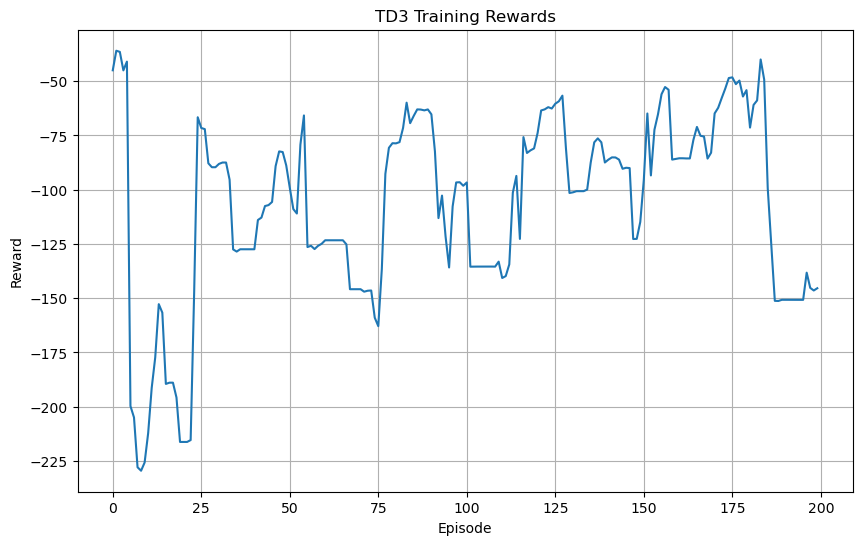

In [5]:
# 绘制奖励曲线
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('TD3 Training Rewards')
plt.grid(True)
plt.show()

In [6]:
# 测试智能体性能
def test_agent(env, agent, num_episodes=10):
    total_rewards = []
    steps_to_completion = []
    
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        
        while True:
            action = agent.select_action(state, evaluate=True)
            state, reward, done, info = env.step(action)
            total_reward += reward
            steps += 1
            
            if done:
                break
                
        total_rewards.append(total_reward)
        steps_to_completion.append(steps)
        
        print(f"Test Episode {episode+1}: Reward = {total_reward:.2f}, Steps = {steps}")
        print(f"  Final orbit error: {info['orbit_error']:.2e}")
        print(f"  Max orbit error: {info['max_error']:.2e}")
        print(f"  Average action magnitude: {info['action_magnitude']:.2e}")
    
    print(f"\nAverage reward: {np.mean(total_rewards):.2f} ± {np.std(total_rewards):.2f}")
    print(f"Average steps to completion: {np.mean(steps_to_completion):.1f} ± {np.std(steps_to_completion):.1f}")
    
    return total_rewards, steps_to_completion

# 运行测试
test_rewards, test_steps = test_agent(env, agent)

Test Episode 1: Reward = -137.60, Steps = 200
  Final orbit error: 3.98e+00
  Max orbit error: 7.94e+00
  Average action magnitude: 1.00e-02
Test Episode 2: Reward = -137.60, Steps = 200
  Final orbit error: 3.98e+00
  Max orbit error: 7.94e+00
  Average action magnitude: 1.00e-02
Test Episode 3: Reward = -137.60, Steps = 200
  Final orbit error: 3.98e+00
  Max orbit error: 7.94e+00
  Average action magnitude: 1.00e-02
Test Episode 4: Reward = -137.60, Steps = 200
  Final orbit error: 3.98e+00
  Max orbit error: 7.94e+00
  Average action magnitude: 1.00e-02
Test Episode 5: Reward = -137.60, Steps = 200
  Final orbit error: 3.98e+00
  Max orbit error: 7.94e+00
  Average action magnitude: 1.00e-02
Test Episode 6: Reward = -137.60, Steps = 200
  Final orbit error: 3.98e+00
  Max orbit error: 7.94e+00
  Average action magnitude: 1.00e-02
Test Episode 7: Reward = -137.60, Steps = 200
  Final orbit error: 3.98e+00
  Max orbit error: 7.94e+00
  Average action magnitude: 1.00e-02
Test Episode 

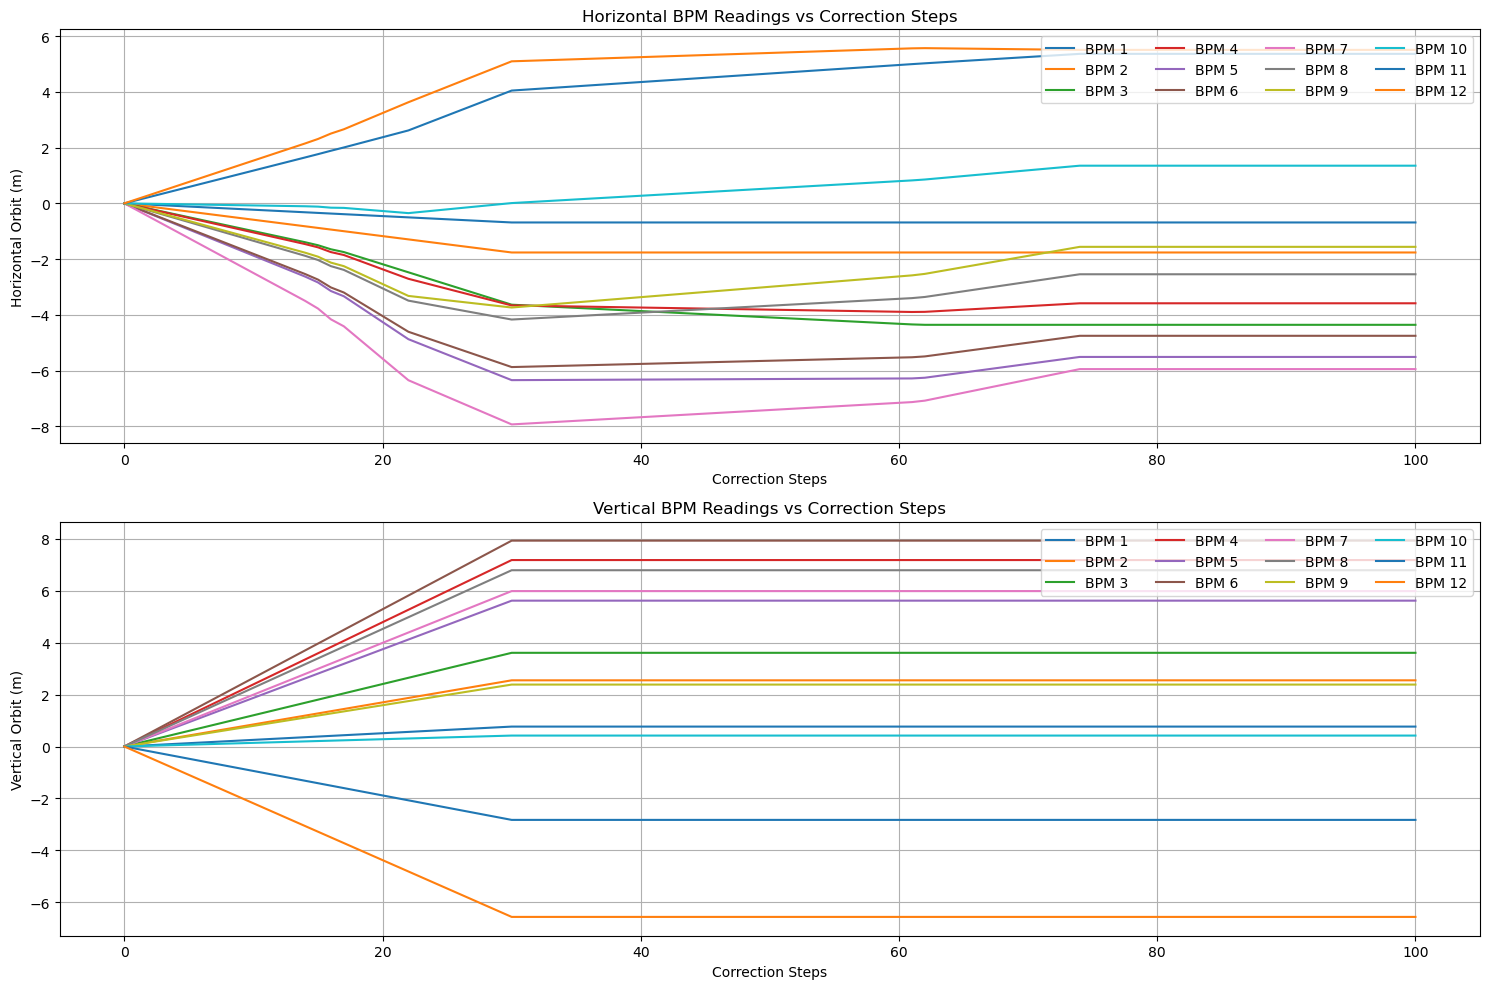

Initial horizontal orbit error: 3.77e-05 m
Final horizontal orbit error: 3.58e+00 m
Initial vertical orbit error: 1.07e-04 m
Final vertical orbit error: 4.39e+00 m
Horizontal improvement ratio: 0.00x
Vertical improvement ratio: 0.00x


In [7]:
# 分析校正前后的轨道差异
def analyze_correction_effect(env, agent):
    # 获取初始轨道
    initial_state = env.reset()
    initial_orbit_x = initial_state[:12]  # 前12个元素是水平BPM读数
    initial_orbit_y = initial_state[12:24]  # 接下来12个元素是垂直BPM读数
    
    # 运行100次校正过程
    state = initial_state.copy()
    orbit_history_x = [initial_orbit_x.copy()]
    orbit_history_y = [initial_orbit_y.copy()]
    
    for step in range(100):  # 执行100步校正
        action = agent.select_action(state, evaluate=True)
        state, reward, done, info = env.step(action)
        current_orbit_x = state[:12]
        current_orbit_y = state[12:24]
        orbit_history_x.append(current_orbit_x.copy())
        orbit_history_y.append(current_orbit_y.copy())
        
        # 不检查done，继续执行100步
    
    # 转换为numpy数组便于分析
    orbit_history_x = np.array(orbit_history_x)
    orbit_history_y = np.array(orbit_history_y)
    
    # 绘制轨道变化
    plt.figure(figsize=(15, 10))
    
    # 水平轨道
    plt.subplot(2, 1, 1)
    for i in range(12):
        plt.plot(orbit_history_x[:, i], label=f'BPM {i+1}')
    plt.xlabel('Correction Steps')
    plt.ylabel('Horizontal Orbit (m)')
    plt.title('Horizontal BPM Readings vs Correction Steps')
    plt.grid(True)
    plt.legend(loc='upper right', ncol=4)
    
    # 垂直轨道
    plt.subplot(2, 1, 2)
    for i in range(12):
        plt.plot(orbit_history_y[:, i], label=f'BPM {i+1}')
    plt.xlabel('Correction Steps')
    plt.ylabel('Vertical Orbit (m)')
    plt.title('Vertical BPM Readings vs Correction Steps')
    plt.grid(True)
    plt.legend(loc='upper right', ncol=4)
    
    plt.tight_layout()
    plt.show()
    
    # 打印统计信息
    print(f"Initial horizontal orbit error: {np.mean(np.abs(initial_orbit_x)):.2e} m")
    print(f"Final horizontal orbit error: {np.mean(np.abs(orbit_history_x[-1])):.2e} m")
    print(f"Initial vertical orbit error: {np.mean(np.abs(initial_orbit_y)):.2e} m")
    print(f"Final vertical orbit error: {np.mean(np.abs(orbit_history_y[-1])):.2e} m")
    
    if np.mean(np.abs(orbit_history_x[-1])) > 0:
        h_improvement = np.mean(np.abs(initial_orbit_x))/np.mean(np.abs(orbit_history_x[-1]))
        print(f"Horizontal improvement ratio: {h_improvement:.2f}x")
    
    if np.mean(np.abs(orbit_history_y[-1])) > 0:
        v_improvement = np.mean(np.abs(initial_orbit_y))/np.mean(np.abs(orbit_history_y[-1]))
        print(f"Vertical improvement ratio: {v_improvement:.2f}x")

# 运行分析
analyze_correction_effect(env, agent)